In [1]:
'''THIS NOTEBOOK ALLOWS YOU TO PLOT EXTENDED DATA FIGURES THAT RELATE TO OUR NEURAL RESULTS'''

from functions import functions_cells_regress as regs
from functions import functions_cells_rsa as rsas
from functions import functions_cells_ext as ext
from functions import functions_cells_svd as SVD
from functions import functions_cells_policy as pol
from scipy import io; import numpy as np

def import_cell_data(path):
    'Import neural data.'
    HP = io.loadmat(path +'/data_recordings/HP.mat')
    PFC = io.loadmat(path + '/data_recordings/PFC.mat')
    
    'Import neual data after accounting for physical movements.'
    HP_dlc = io.loadmat(path +'/data_recordings/after PCA /HP_dlc_pca.mat')
    PFC_dlc = io.loadmat(path + '/data_recordings/after PCA /PFC_dlc_pca.mat')
    
    return HP, PFC, HP_dlc, PFC_dlc


In [2]:
'''Edit your path to the data folder and import neural data here. 
  HP and PFC will contain raw neural data.
  HP_dlc and PFC_dlc will contain neural data after accounting for fine physical movements using DeepLabCut data.'''

your_path_to_data = 'data_share/'
HP, PFC, HP_dlc, PFC_dlc =  import_cell_data(your_path_to_data)

'''n_perms parameter determines the number of permutations to sessions to run 
   (used in some of the Extended Figures below); paper used n_perms = 5000 but such high numbers will 
   take a long time to run.'''
n_perms = 100

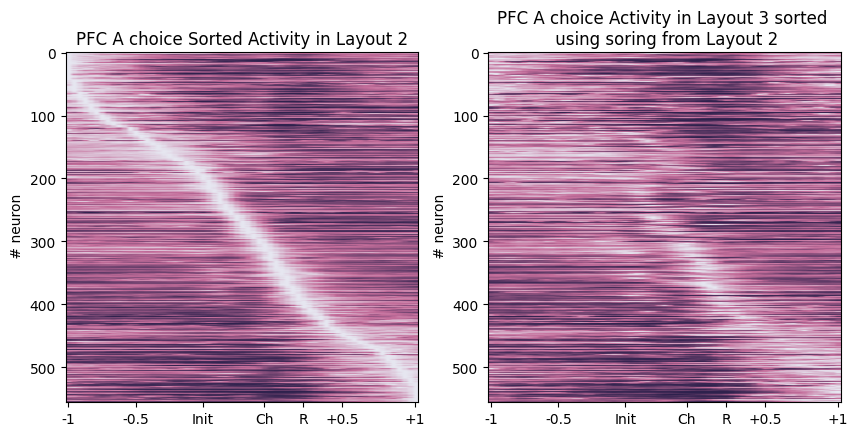

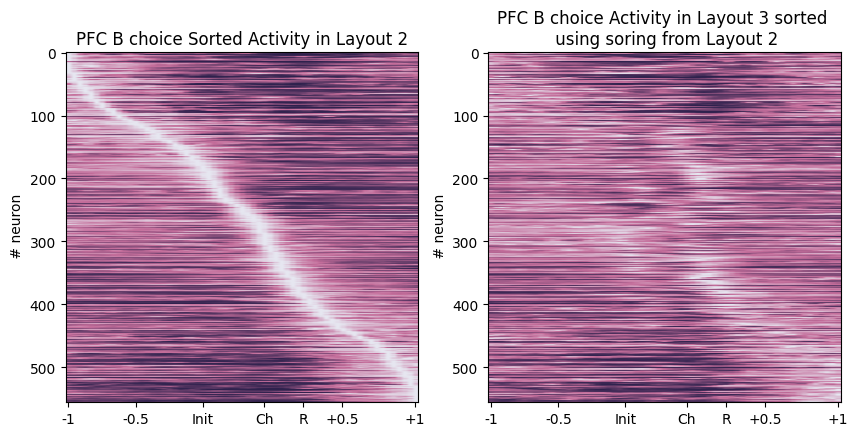

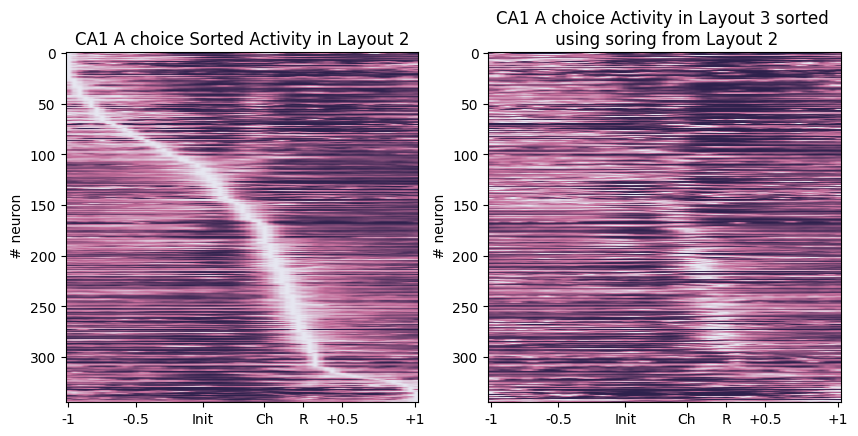

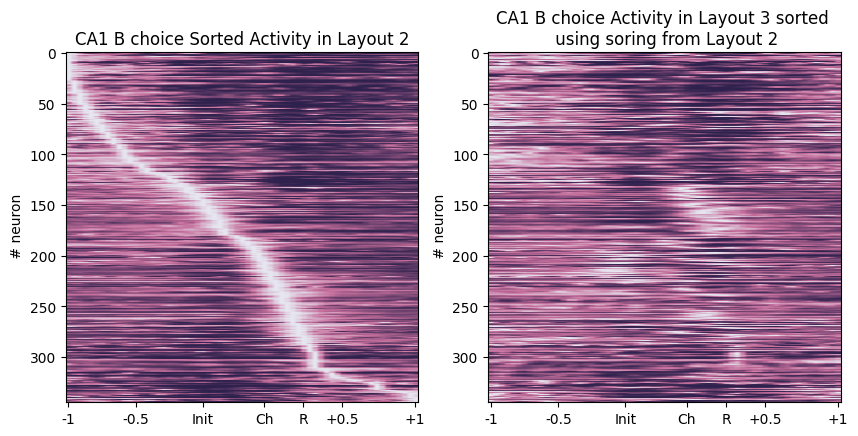

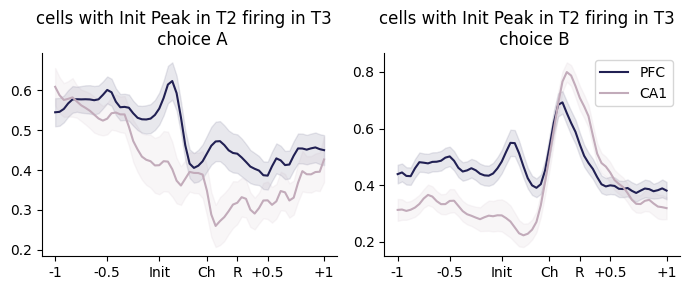

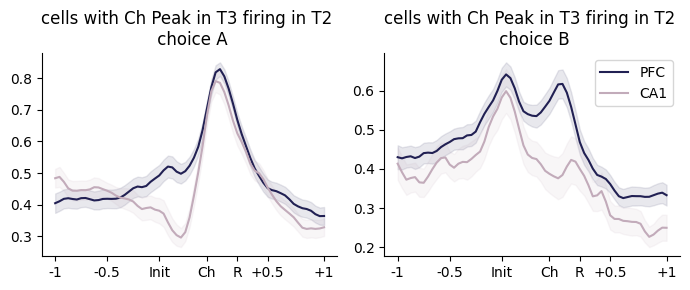

In [3]:
'''Extended Data Fig. 4A-D | Sorting neurons by their time of peak activity in Layout Type 2 and plotting their activity in Layout
   Types 2 and 3. The B Choice port in Layout Type 3 was the Initiation port in Layout Type 2. For comparison we also plotted A choices that shared the same
   physical port in both layouts.
   
   Extended Data Fig. 4E | Selecting cells with peak firing rate around INITIATION in Layout Type
   2 and plotting their average activity in Layout Type 3 on A (left) and B (right) choice trials. 
   
   Extended Data Fig. 4F | Selecting cells with peak firing rate around A (left) or B (right) choices in Layout Type 3
   and plotted their average activity in Layout Type 2 on A (left) and B (right) choice trials. '''
ext.plot_Init_B_remapping(PFC, HP)



In [ ]:
'''Extended Data Fig. 5A | Coefficients of partial determination from the linear model shown in Fig. 3a for choice, outcome,
   and outcome x choice regressors in PFC and CA1.
   
   Animal based permutation tests. Significance of key differences between CA1 and PFC 
   assessed by permuting subjects between regions, rather than sessions as done in main figures.'''
regs.plot_simple_GLM(HP,PFC, n_perm = n_perms, animal_perm = True)


In [ ]:
'''Extended Data Fig. 5B | Coefficients of partial determination in a regression analysis modelling the pattern of representation
   similarities using the RDMs shown in Fig. 4d.
   
   Animal based permutation tests. Significance of key differences between CA1 and PFC 
   assessed by permuting subjects between regions, rather than sessions as done in main figures.'''
rsas.RSA_across_time_plot(HP, PFC, perm_n = True, animal_perm = True, dlc = False)


In [ ]:
'''Extended Data Fig. 5C | Sums along the diagonal of the correlation matrices shown in Fig. 6c
   separately for A and B choices.
   
   Animal based permutation tests. Significance of key differences between CA1 and PFC 
   assessed by permuting subjects between regions, rather than sessions as done in main figures.'''
pol.plot_correlations_slice(PFC, HP, n = 11, c_1 = 1, perm_n = False, dlc = False, animal_perm = True)

'''Extended Data Fig. 5D | Slices through the correlation matrices at initiation (left), choice (centre)
   and outcome (right) times for A (solid) and B (dash line) choices.
   
   Animal based permutation tests. Significance of key differences between CA1 and PFC 
   assessed by permuting subjects between regions, rather than sessions as done in main figures.'''
pol.plot_diagonal_sums(HP, PFC, c_1 = 1, perm_n = True, dlc = False, animal_perm = True)


In [ ]:
'''Extended Data Fig. 7C | Representation similarity at 'choice time' (left) and 'outcome time' (right), quantified as
   the Pearson correlation between the residual neural activity (after accounting for movement related parameters) 
   vectors for each pair of task conditions as in Fig. 4c.
   
   Extended Data Fig. 7D | Representational Similarity Design Matrices (RDMs) used to model the patterns of
   representation similarity observed in the data. Port RDM was not included in this analysis as the PCs we 
   regress out to account for movement related activity correlate strongly with the port position in the task (as in b).
   Using an RDM that is so highly correlated with a parameter that has already been regressed out can lead to false correlations (a la Berkson’s paradox).
   
   Extended Data Fig. 7E | Coefficients of partial determination in a regression analysis modelling the pattern of 
   representation similarities in residual firing rates using the RDMs in D.
   
   n_perms parameter determines the number of permutations to sessions to run; paper used n_perms = 5000
   but such high numbers will take a long time to run.'''
rsas.RSA_across_time_plot(HP_dlc, PFC_dlc, perm_n = n_perms, dlc = True)
   
'''Extended Data Fig. 7F-G | Policy analyses conducted on residual firing rates after
   accounting for movement related activity. The generalisation of policy on A trials is no longer stronger in PFC than CA1. Stars denote significance levels from two-sided permutation tests
   across sessions corrected for multiple comparison over time points. Controls of precise physical movements in singular value decomposition analyses are
   presented in the main text (Fig. 5d–j).'''
pol.plot_policy_simple_GLM(HP_dlc,PFC_dlc, n_perm = n_perms, n = 11, dlc = True) 
pol.plot_correlations_slice(PFC_dlc, HP_dlc, n = 11, c_1 = 1, perm_n = n_perms, dlc = True, animal_perm = False)
pol.plot_diagonal_sums(HP_dlc, PFC_dlc, perm_n = n_perms, dlc = True)


In [ ]:
'''Extended Data Fig. 8 | Rapid problem-induced ‘remapping’ in CA1 but not PFC. The change in activity across 
   transitions between problems was quantified using a ‘surprise’ measure indicating how unexpected the population 
   activity was on each trial and time-point given the average activity at that time-point across 10 ‘baseline’ trials 
   prior to those shown in the figure (see Surprise Measure Methods). 
   
   Extended Data Fig. 8A-J | Heatmaps showing how surprising the activity at each time point of each trial was around
   transitions between problems. Activity in CA1 on A and B choice trials is shown in a-c and d-f respectively.
   Activity in PFC on A and B choice trials is shown in g-i and j-l respectively.
   
   In CA1, when an initiation or choice port moved to a different physical location, the neuronal representation at the corresponding stage of the trial changed immediately, as indicated by an abrupt
   increase in surprise at the layout transition a-f.'''
ext.surprise_plot(HP, PFC)



In [ ]:
'''Extended Data Fig. 9A | Generalization of low dimensional structure of activity across problems when considering
   all time-points in the trial (raw firing rates)
   
   note! n_perms parameter determines the number of permutations to sessions to run; paper used n_perms = 5000
   but such high numbers will take a long time to run.'''
SVD.plot_supplementary(HP, PFC, inds = np.arange(63), animal_perm = False, n_perms = n_perms)


In [ ]:
'''Extended Data Fig. 9B | Generalization of low dimensional structure of activity across problems when considering
   only time-points between initiation and choice (raw firing rates),  '''
SVD.plot_supplementary(HP, PFC, inds = np.arange(24,35), animal_perm = False, n_perms = n_perms)
  


In [ ]:
'''Extended Data Fig. 9C | Generalization of low dimensional structure of activity across problems when considering
   only time-points between initiation and choice using residual firing rates after accounting for physical movement.'''
SVD.plot_supplementary(HP_dlc, PFC_dlc, inds = np.arange(24,39), animal_perm = False, n_perms = n_perms)



In [ ]:
'''Extended Data Fig. 9D | Permutation tests for significance of differences between CA1 and PFC in generalization of temporal, 
   cellular and cellular and temporal singular vectors, based on the null distribution obtained by shuffling animals across
   groups (raw firing rates) or sessions (residual firing rates after accounting for physical space).
   
   We could not permute animals in the analyses of residual firing rates because we were not set up for recording video data for our first implanted animal.'''    
SVD.plot_supplementary(HP,PFC, inds = np.arange(24,35), animal_perm = True, n_perms = False)
